In [18]:
import sys,os
REPO_ROOT_DIR="../"
sys.path.append(os.path.dirname(REPO_ROOT_DIR))
#import plotly.express as px
#from umap import UMAP
#from numpy.fft import fft
#import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import src.utils.report_ut as r_ut 
import src.utils.dataset_utils as ds_ut


In [19]:
### se o diretorio não existe baixa os arquivos na pasta data
from src.raw_data import download_dataset as dw
dw.download_zenodo_datasets()

Directories already exist. Skipping download.


In [20]:
## a classe StandardizedViewDataset permite carregar os dados de diferentes datasets e diferentes sensores .. 
### testar depois com dados do magnetometro######
from src.raw_data.standartized_balanced import StandardizedViewDataset
data_folder = "data/standardized_view"
svd = StandardizedViewDataset(data_folder=data_folder)
# Carrega um dataset específico e retorna o DataFrame com dados do acelerômetro
df_kuhar = svd.load_dataset("KuHar", sensors=['accel',"gyro"])
print(df_kuhar.shape)

# Combina vários datasets, filtrando apenas dados de giroscópio e acelerômetro
df_combined = svd.combine_datasets(["KuHar", "MotionSense"], sensors=['accel', 'gyro'])
print(df_combined.shape)


(1392, 361)
(4950, 362)


In [21]:
# Lista de datasets e atividades
datasets = ["KuHar", "MotionSense", "RealWorld_thigh", "RealWorld_waist", "UCI", "WISDM"]
activity_names = ['sit', 'stand', 'walk', 'stair up', 'stair down', 'run']
activity_code_mapping = {i: name for i, name in enumerate(activity_names)}

# DataFrame para armazenar as contagens de labels
label_counts_df = pd.DataFrame(index=activity_names)

for dataset in datasets:
    # Carrega o dataset
    standardized_view_dataset = StandardizedViewDataset(data_folder, "train")
    df = standardized_view_dataset.load_dataset(dataset, sensors=['accel', 'gyro'])
    
    # Obtém as contagens de amostras por label
    y_train = df['standard activity code']
    label_counts = y_train.value_counts().reindex(range(len(activity_names)), fill_value=0)
    
    label_counts.index = label_counts.index.map(activity_code_mapping)
    
    # Adiciona os dados ao DataFrame de contagem
    label_counts_df[dataset] = label_counts

# Adiciona uma coluna total para cada label
label_counts_df['Total'] = label_counts_df.sum(axis=1)

# Exibe a tabela resultante
print(label_counts_df)



            KuHar  MotionSense  RealWorld_thigh  RealWorld_waist  UCI  WISDM  \
sit           232          593             1723             1722  484   2187   
stand         232          593             1723             1722  484   2187   
walk          232          593             1723             1722  484   2187   
stair up      232          593             1723             1722  484      0   
stair down    232          593             1723             1722  484      0   
run           232          593             1723             1722    0   2187   

            Total  
sit          6941  
stand        6941  
walk         6941  
stair up     4754  
stair down   4754  
run          6457  


In [22]:


def comparation_by_label_matplotlib(df):
    fig, ax = plt.subplots(figsize=(12, 6))
    bottom = None
    datasets = df.columns[:-1]  # Ignora a coluna 'Total'
    
    for dataset in datasets:
        if bottom is None:
            bottom = df[dataset]
            ax.bar(df.index, df[dataset], label=dataset)
        else:
            ax.bar(df.index, df[dataset], bottom=bottom, label=dataset)
            bottom += df[dataset]

    ax.set_title('Comparação da Quantidade de Amostras por Label para Cada Dataset')
    ax.set_xlabel('Label')
    ax.set_ylabel('Quantidade de Amostras')
    ax.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Ajustar os ticks do eixo x e os rótulos
    ax.set_xticks(range(len(df.index)))
    ax.set_xticklabels(df.index, rotation=45)
    plt.tight_layout()

    return fig

# Função para gerar o segundo gráfico (Total por Label)
def total_by_label_matplotlib(df):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(df.index, df['Total'], color='skyblue', label='Total')
    
    ax.set_title('Quantidade Total de Amostras por Label')
    ax.set_xlabel('Label')
    ax.set_ylabel('Quantidade Total de Amostras')
    
    # Ajustar os ticks do eixo x e os rótulos
    ax.set_xticks(range(len(df.index)))
    ax.set_xticklabels(df.index, rotation=45)
    plt.tight_layout()

    return fig


fig1 = comparation_by_label_matplotlib(label_counts_df)
fig2 = total_by_label_matplotlib(label_counts_df)

r_ut.save_fig_pdf('../reports/exploring all datasets.pdf', fig1, fig2)

Figuras salvas no arquivo '../reports/exploring all datasets.pdf'.


In [23]:
datasets=["KuHar","MotionSense","RealWorld_thigh","RealWorld_waist","UCI","WISDM"]
activity_names=['sit', 'stand', 'walk', 'stair up', 'stair down', 'run', 'stair up and down']
all_xtrain_data=[]
all_ytrain_data=[]
for dataset in datasets:
    standardized_view_dataset = StandardizedViewDataset(data_folder, "train")
    df = svd.load_dataset(dataset, sensors=['accel',"gyro"])
    print(df.shape) 
    X_train = df.drop(columns=['standard activity code'])
    y_train = df['standard activity code']
    print(f'{dataset} {X_train.shape}')
    print(f"Label counts for :{ y_train.value_counts()}")
    transformation=' raw '
    fig= ds_ut.plot_umap_by_label(dataset,transformation, X_train, y_train, activity_names)
    r_ut.save_fig_pdf('../reports/exploring all datasets.pdf', fig, append=True)  

   
# Combina vários datasets, filtrando apenas dados de giroscópio e acelerômetro
df_combined = svd.combine_datasets(datasets, sensors=['accel', 'gyro'])
print(df_combined.shape)
X_train_c = df_combined.drop(columns=['standard activity code','source'])
y_train_c = df_combined['standard activity code']
fig=ds_ut.plot_umap_by_label("df_combined","", X_train_c, y_train_c, activity_names)
r_ut.save_fig_pdf('../reports/exploring all datasets.pdf', fig, append=True)




(1392, 361)
KuHar (1392, 360)
Label counts for :standard activity code
1    232
0    232
2    232
5    232
3    232
4    232
Name: count, dtype: int64


/HDD/dados/amparo/disciplinas/ger_ghar/GenHAR/projetos/GenHAR/notebooks/../src/utils/dataset_utils.py:17: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 7
  ax.legend(handles=handles, labels=class_names, title="Classes")


Figuras salvas no arquivo '../reports/exploring all datasets.pdf'.
(3558, 361)
MotionSense (3558, 360)
Label counts for :standard activity code
4    593
5    593
0    593
1    593
3    593
2    593
Name: count, dtype: int64


/HDD/dados/amparo/disciplinas/ger_ghar/GenHAR/projetos/GenHAR/notebooks/../src/utils/dataset_utils.py:17: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 7
  ax.legend(handles=handles, labels=class_names, title="Classes")


Figuras salvas no arquivo '../reports/exploring all datasets.pdf'.
(10338, 361)
RealWorld_thigh (10338, 360)
Label counts for :standard activity code
4    1723
3    1723
5    1723
0    1723
1    1723
2    1723
Name: count, dtype: int64


/HDD/dados/amparo/disciplinas/ger_ghar/GenHAR/projetos/GenHAR/notebooks/../src/utils/dataset_utils.py:17: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 7
  ax.legend(handles=handles, labels=class_names, title="Classes")


Figuras salvas no arquivo '../reports/exploring all datasets.pdf'.
(10332, 361)
RealWorld_waist (10332, 360)
Label counts for :standard activity code
4    1722
3    1722
5    1722
0    1722
1    1722
2    1722
Name: count, dtype: int64


/HDD/dados/amparo/disciplinas/ger_ghar/GenHAR/projetos/GenHAR/notebooks/../src/utils/dataset_utils.py:17: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 7
  ax.legend(handles=handles, labels=class_names, title="Classes")


Figuras salvas no arquivo '../reports/exploring all datasets.pdf'.
(2420, 361)
UCI (2420, 360)
Label counts for :standard activity code
2    484
3    484
4    484
0    484
1    484
Name: count, dtype: int64


/HDD/dados/amparo/disciplinas/ger_ghar/GenHAR/projetos/GenHAR/notebooks/../src/utils/dataset_utils.py:17: UserWarning: Mismatched number of handles and labels: len(handles) = 5 len(labels) = 7
  ax.legend(handles=handles, labels=class_names, title="Classes")


Figuras salvas no arquivo '../reports/exploring all datasets.pdf'.
(8748, 361)
WISDM (8748, 360)
Label counts for :standard activity code
2    2187
5    2187
0    2187
1    2187
Name: count, dtype: int64


/HDD/dados/amparo/disciplinas/ger_ghar/GenHAR/projetos/GenHAR/notebooks/../src/utils/dataset_utils.py:17: UserWarning: Mismatched number of handles and labels: len(handles) = 4 len(labels) = 7
  ax.legend(handles=handles, labels=class_names, title="Classes")


Figuras salvas no arquivo '../reports/exploring all datasets.pdf'.
(36788, 362)


/HDD/dados/amparo/disciplinas/ger_ghar/GenHAR/projetos/GenHAR/notebooks/../src/utils/dataset_utils.py:17: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 7
  ax.legend(handles=handles, labels=class_names, title="Classes")


Figuras salvas no arquivo '../reports/exploring all datasets.pdf'.


In [33]:
datasets=["KuHar","MotionSense","RealWorld_thigh","RealWorld_waist","UCI","WISDM"]
activity_names=['sit', 'stand', 'walk', 'stair up', 'stair down', 'run', 'stair up and down']

for dataset in datasets:
    standardized_view_dataset = StandardizedViewDataset(data_folder, "train")
    df = svd.load_dataset(dataset, sensors=['accel',"gyro"])
    print(df.head())
    #standardized_view_dataset.plot_accel_samples_per_label(num_samples_per_label=4)
df.head()

   accel-x-0  accel-x-1  accel-x-2  accel-x-3  accel-x-4  accel-x-5  \
0  -0.024115  -0.035937   0.010671  -0.007868  -0.014384  -0.017105   
1   0.068541  -0.007344  -0.076044   0.050345  -0.008048   0.002233   
2   0.003544  -0.027130   0.000164   0.004846   0.023322   0.000502   
3  -0.010800   0.005663   0.002110   0.001833  -0.005506  -0.014097   
4  -0.030275   0.003600  -0.012994   0.000229  -0.003105  -0.033265   

   accel-x-6  accel-x-7  accel-x-8  accel-x-9  ...  gyro-z-51  gyro-z-52  \
0   0.008638  -0.005015  -0.006842  -0.008047  ...  -0.010667  -0.011297   
1   0.006813  -0.020249  -0.013751   0.016013  ...   0.002302   0.001242   
2   0.007248  -0.003158  -0.002916   0.047178  ...   0.007140   0.004176   
3   0.011826   0.002192  -0.008665   0.004223  ...   0.002041  -0.000729   
4  -0.002360  -0.016093   0.012353  -0.000187  ...   0.008468   0.006435   

   gyro-z-53  gyro-z-54  gyro-z-55  gyro-z-56  gyro-z-57  gyro-z-58  \
0  -0.007699  -0.009997  -0.011715  -0.011114

,accel-x-0,accel-x-1,accel-x-2,accel-x-3,accel-x-4,accel-x-5,accel-x-6,accel-x-7,accel-x-8,accel-x-9,...,gyro-z-51,gyro-z-52,gyro-z-53,gyro-z-54,gyro-z-55,gyro-z-56,gyro-z-57,gyro-z-58,gyro-z-59,standard activity code
0,0.550232,3.188394,0.201385,-1.866123,-2.763684,1.186544,0.705521,-0.818089,-0.305727,-0.980729,...,0.569715,0.112993,-0.016943,0.082336,0.492151,0.199144,1.023751,-0.551919,-0.847473,2
1,-0.845642,2.849746,0.819272,1.752620,0.024921,-0.872890,-1.068011,-0.340189,-0.762406,-2.374736,...,0.346291,-0.204938,-0.576002,-0.808110,-0.946187,-0.688830,0.085791,0.646415,1.101547,2
2,-0.529279,-1.312229,0.267284,0.740674,0.237883,-0.537407,0.744115,0.517098,-0.952201,2.502723,...,-0.464508,-1.378149,-0.438048,0.062918,-0.412848,-0.760098,-0.648634,-0.447404,-0.189661,2
3,1.412971,1.946926,0.890790,-0.447067,0.210172,1.033004,0.129366,-2.512947,-3.948992,-3.960705,...,1.687915,0.533150,-1.555945,-1.146842,-0.877783,-2.965542,-5.113045,-4.974048,-0.868057,2
4,-1.974706,0.836329,0.334619,-0.346837,0.531329,0.446542,-0.607665,-2.478647,1.740978,-1.619372,...,0.346809,-0.008485,-0.215584,0.123158,0.385375,0.193499,-0.022066,0.140561,0.202345,2


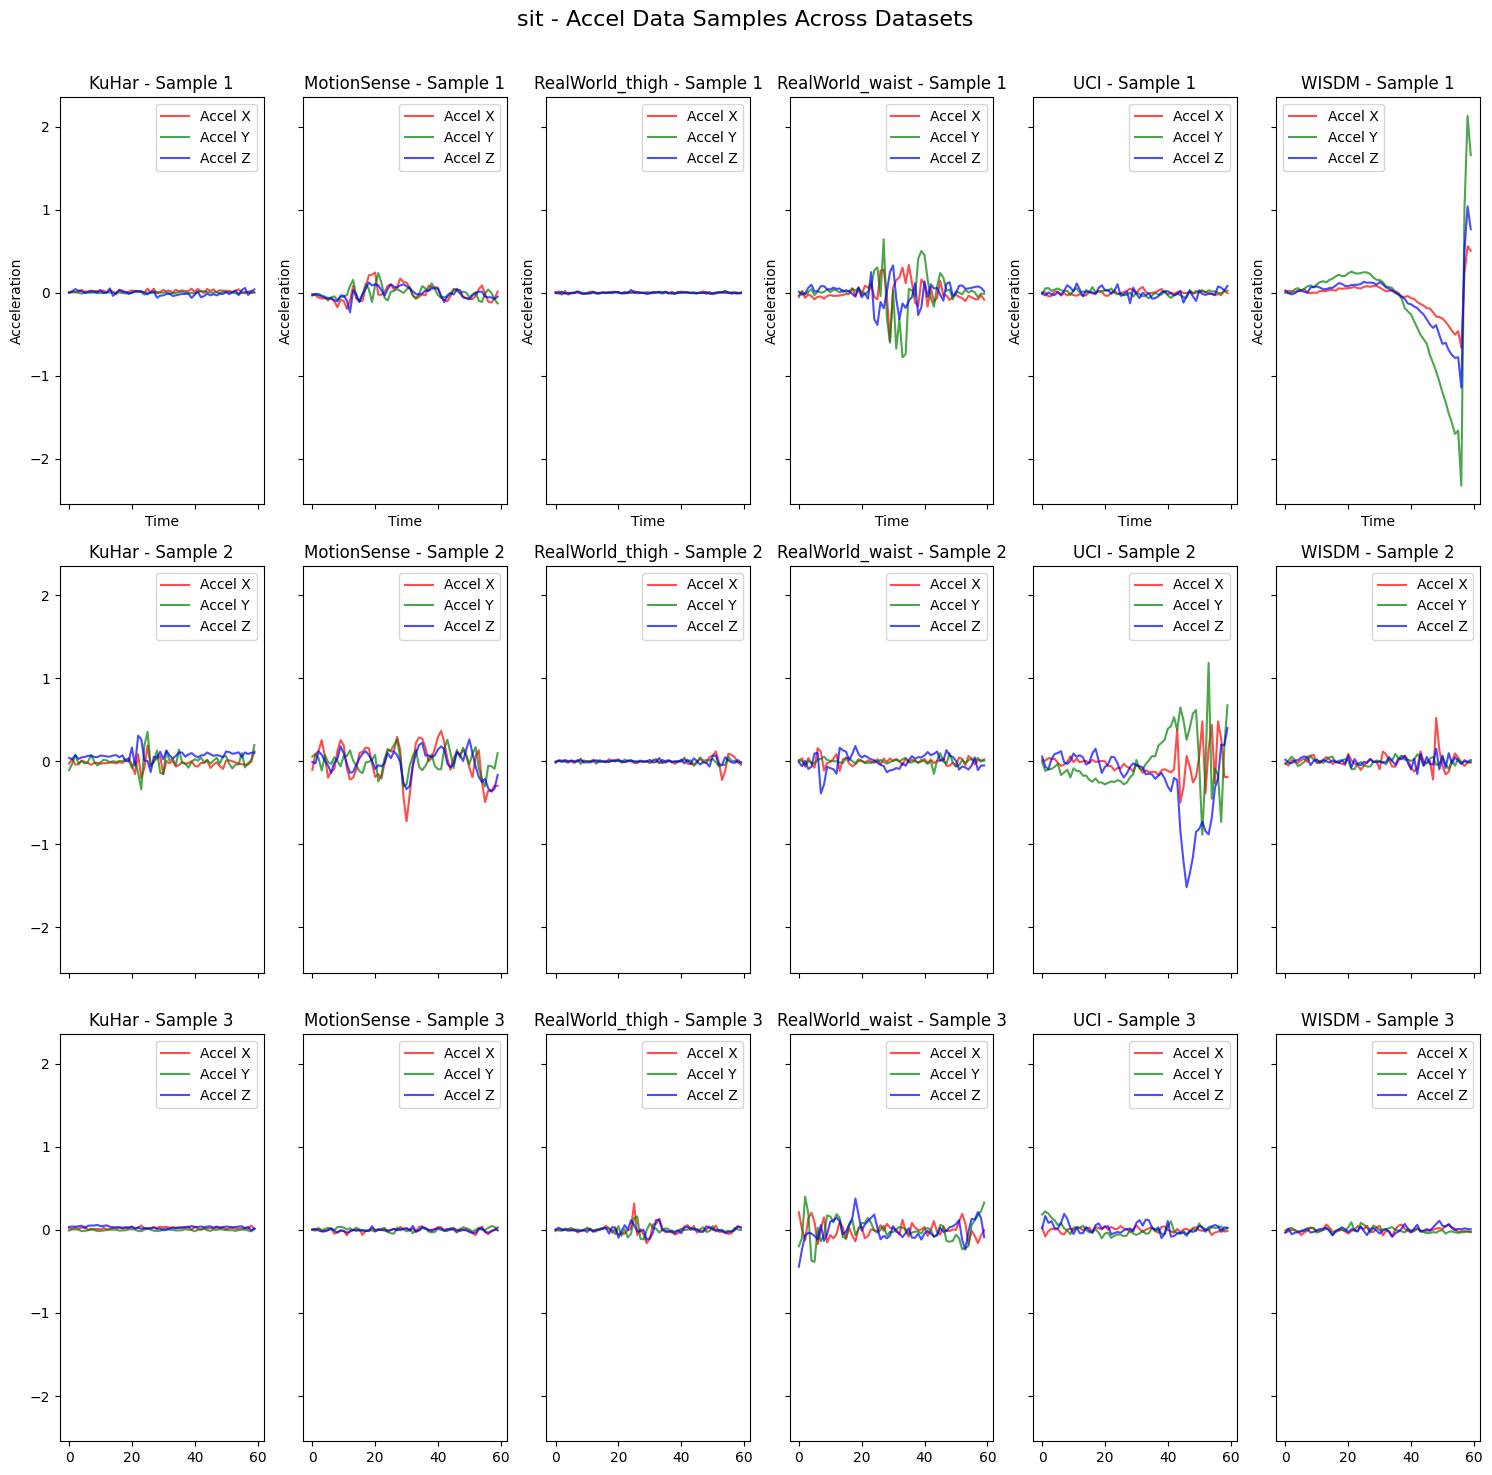

Figuras salvas no arquivo '../reports/exploring all datasets.pdf'.


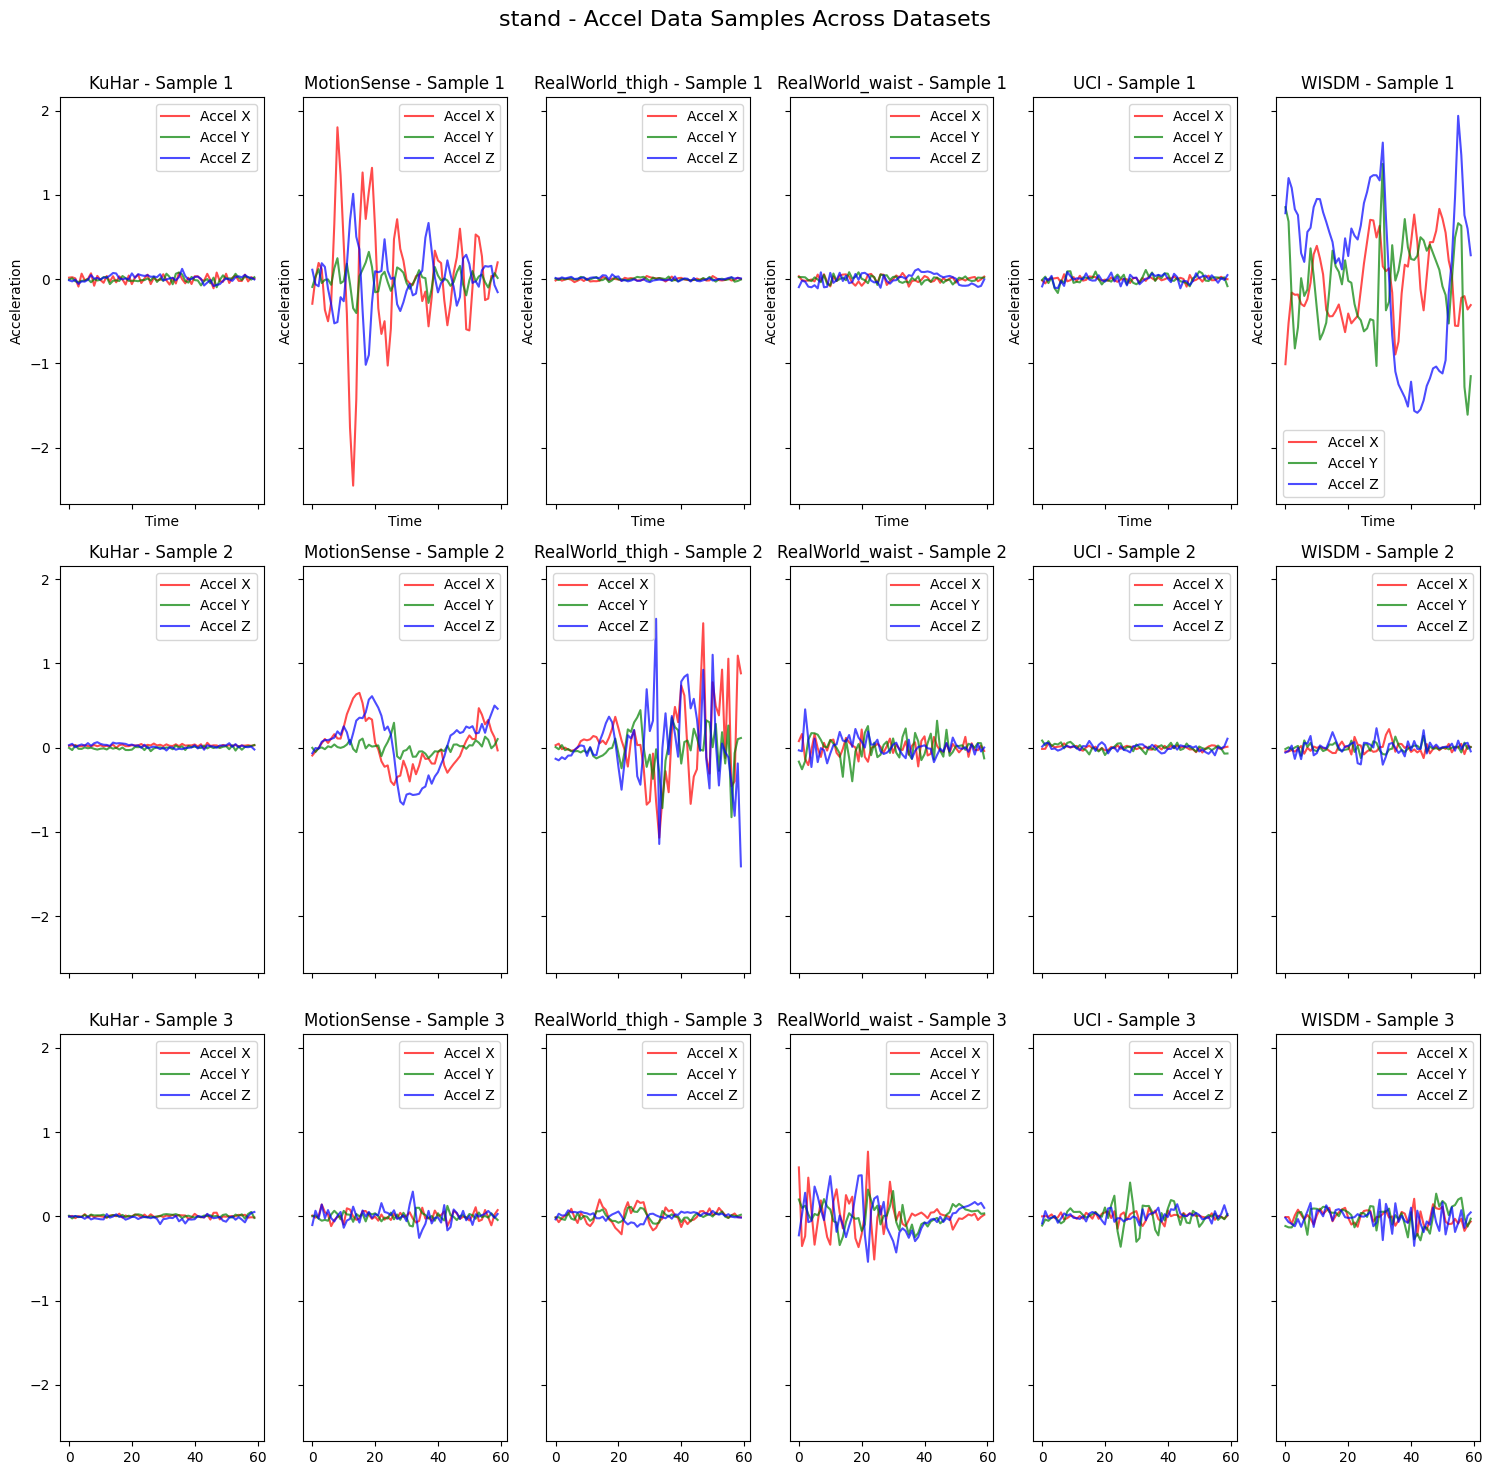

Figuras salvas no arquivo '../reports/exploring all datasets.pdf'.


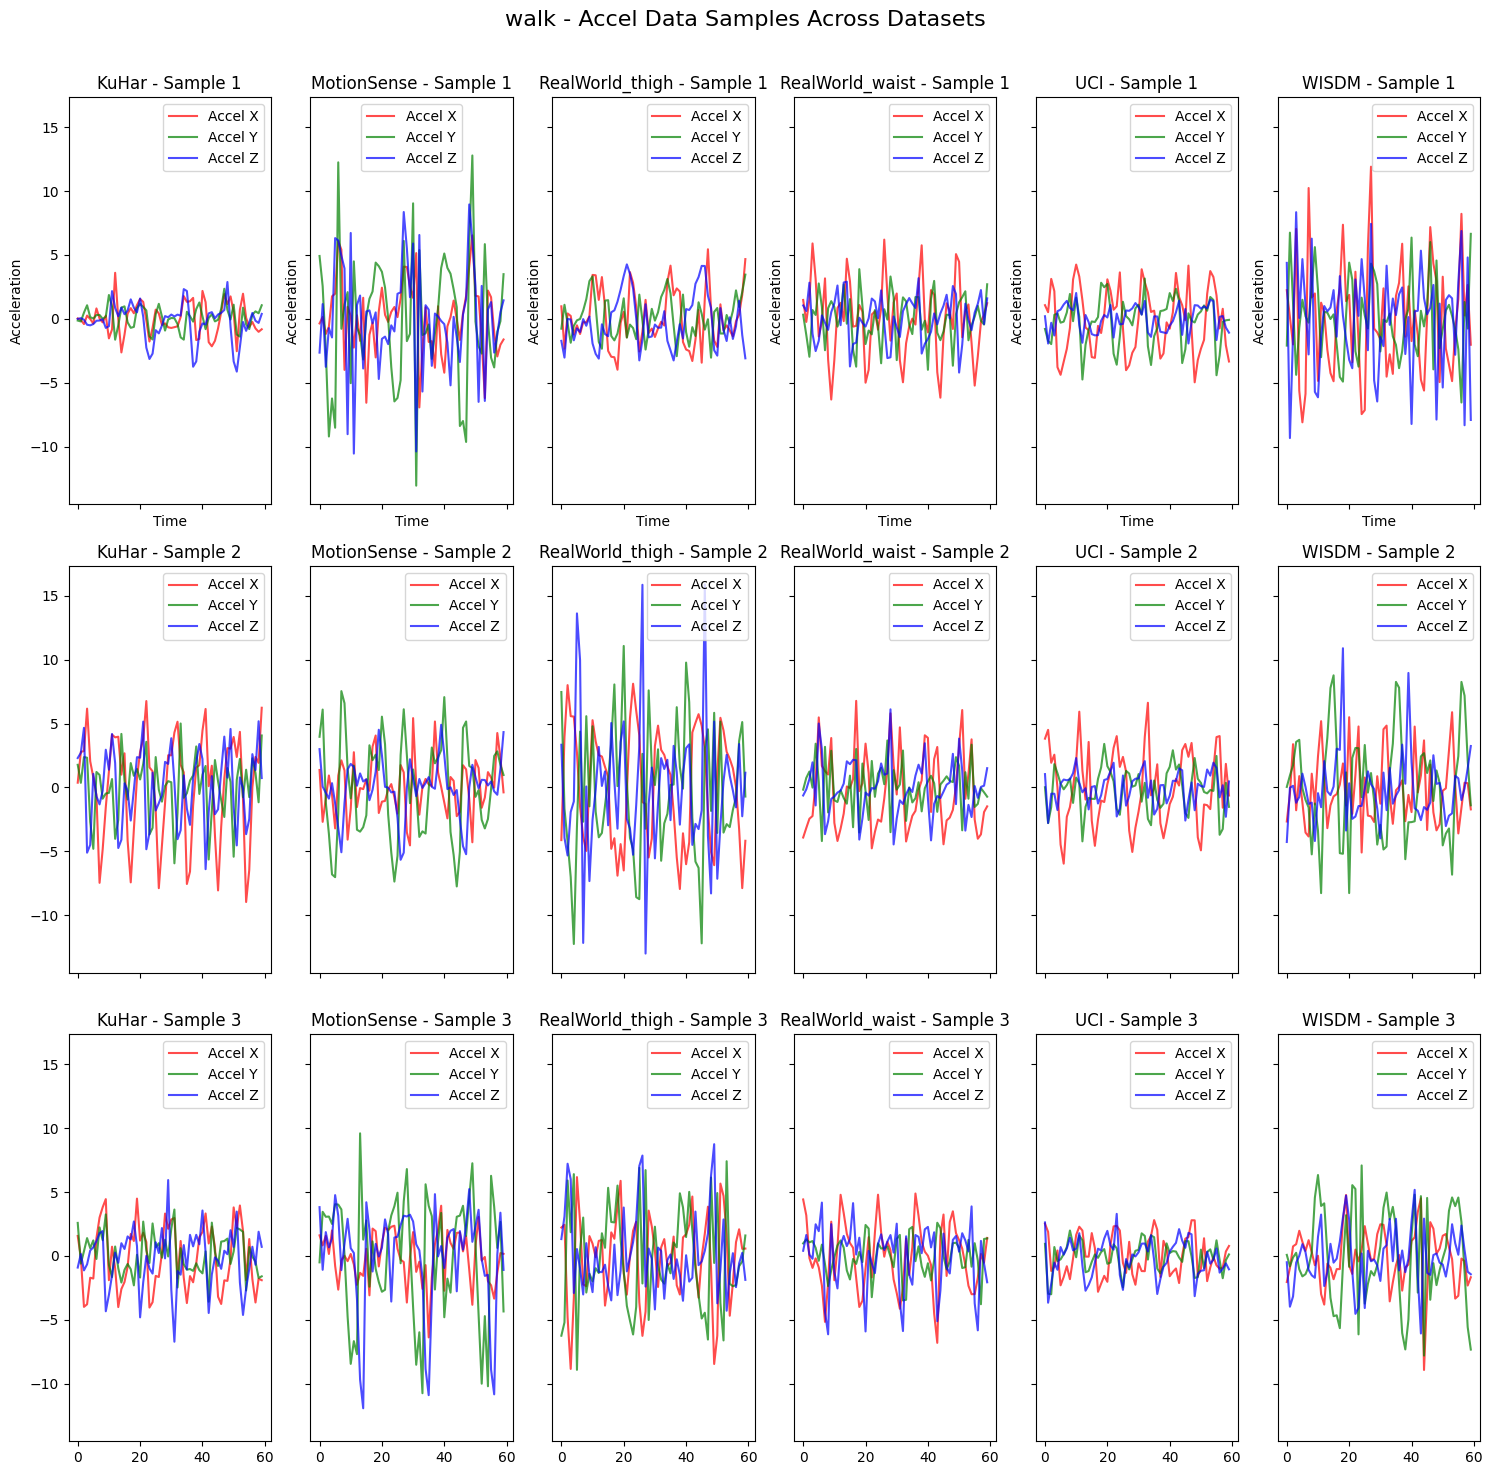

Figuras salvas no arquivo '../reports/exploring all datasets.pdf'.
No data available for activity: stair up in dataset: WISDM


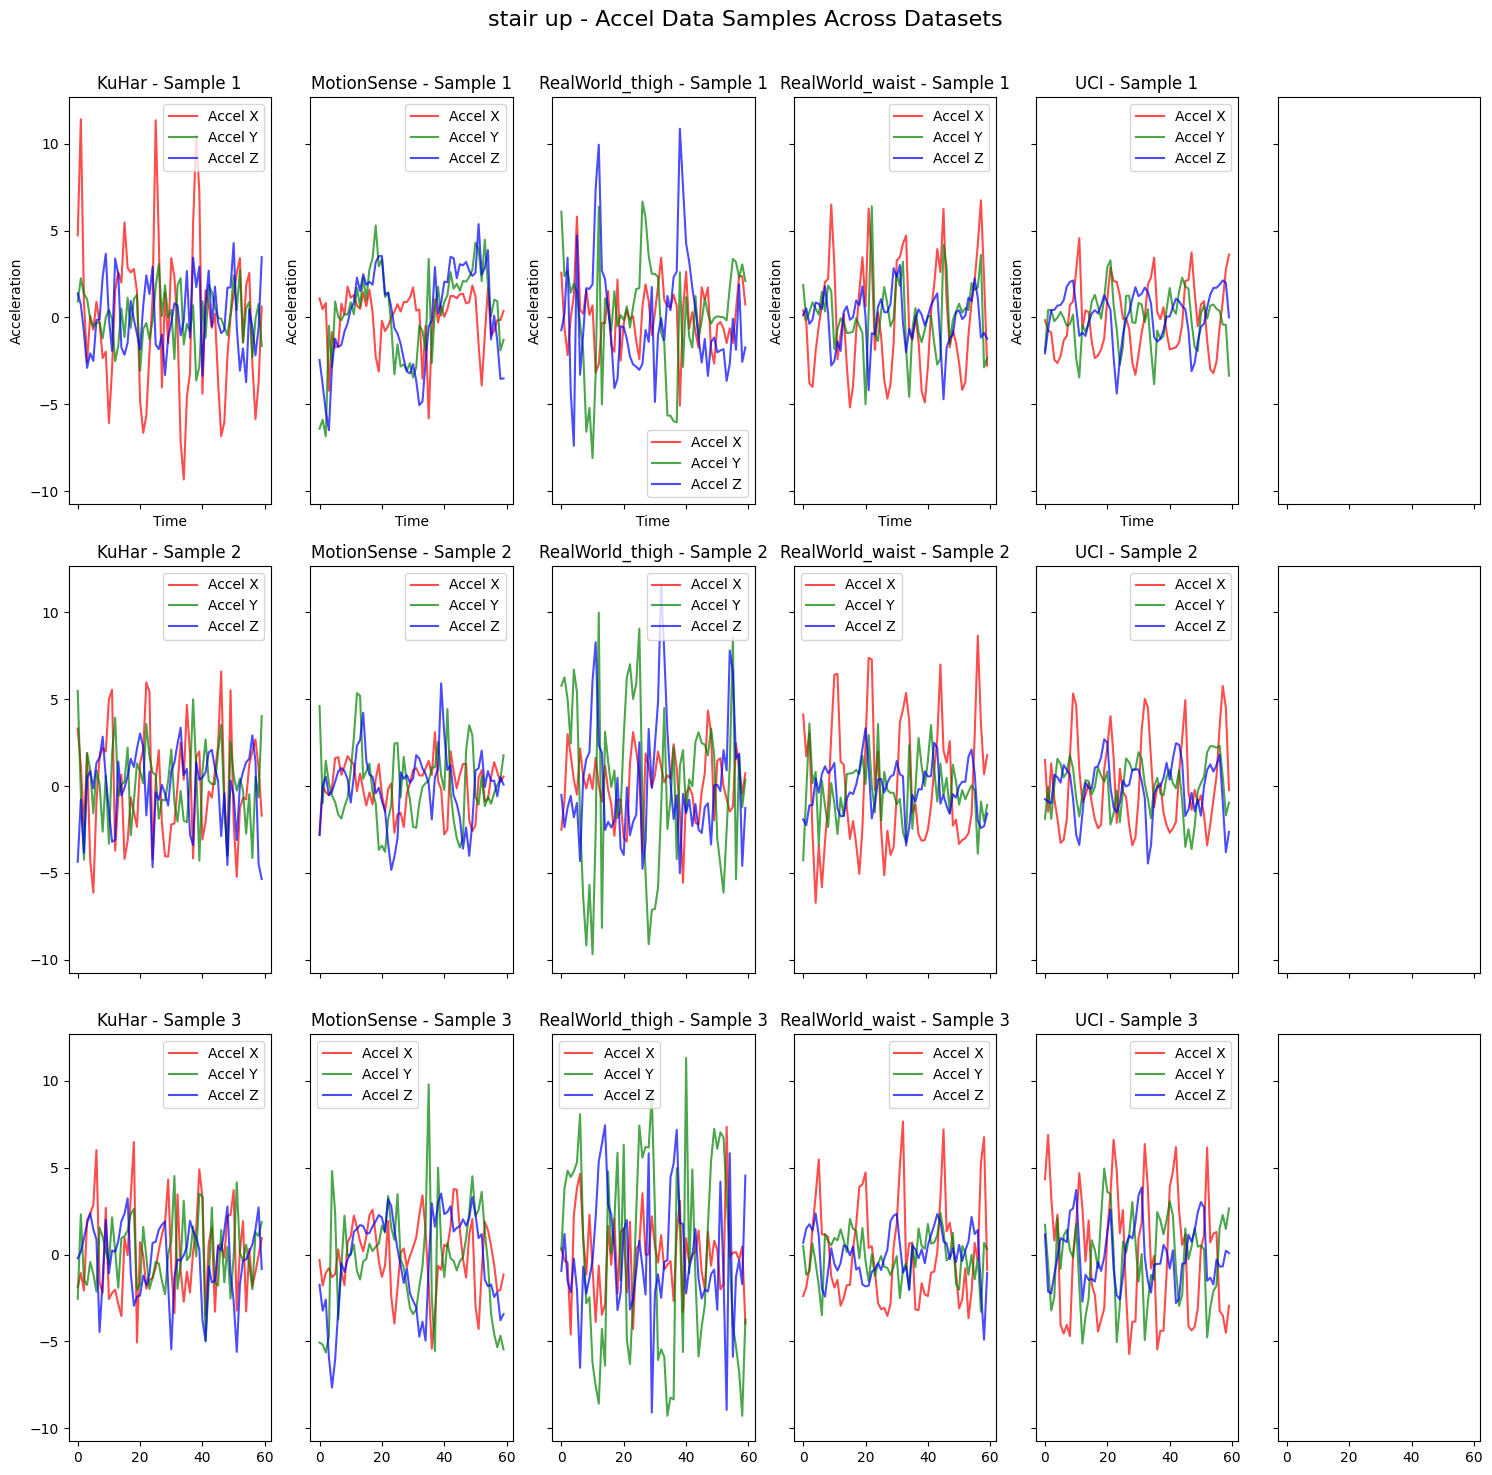

Figuras salvas no arquivo '../reports/exploring all datasets.pdf'.
No data available for activity: stair down in dataset: WISDM


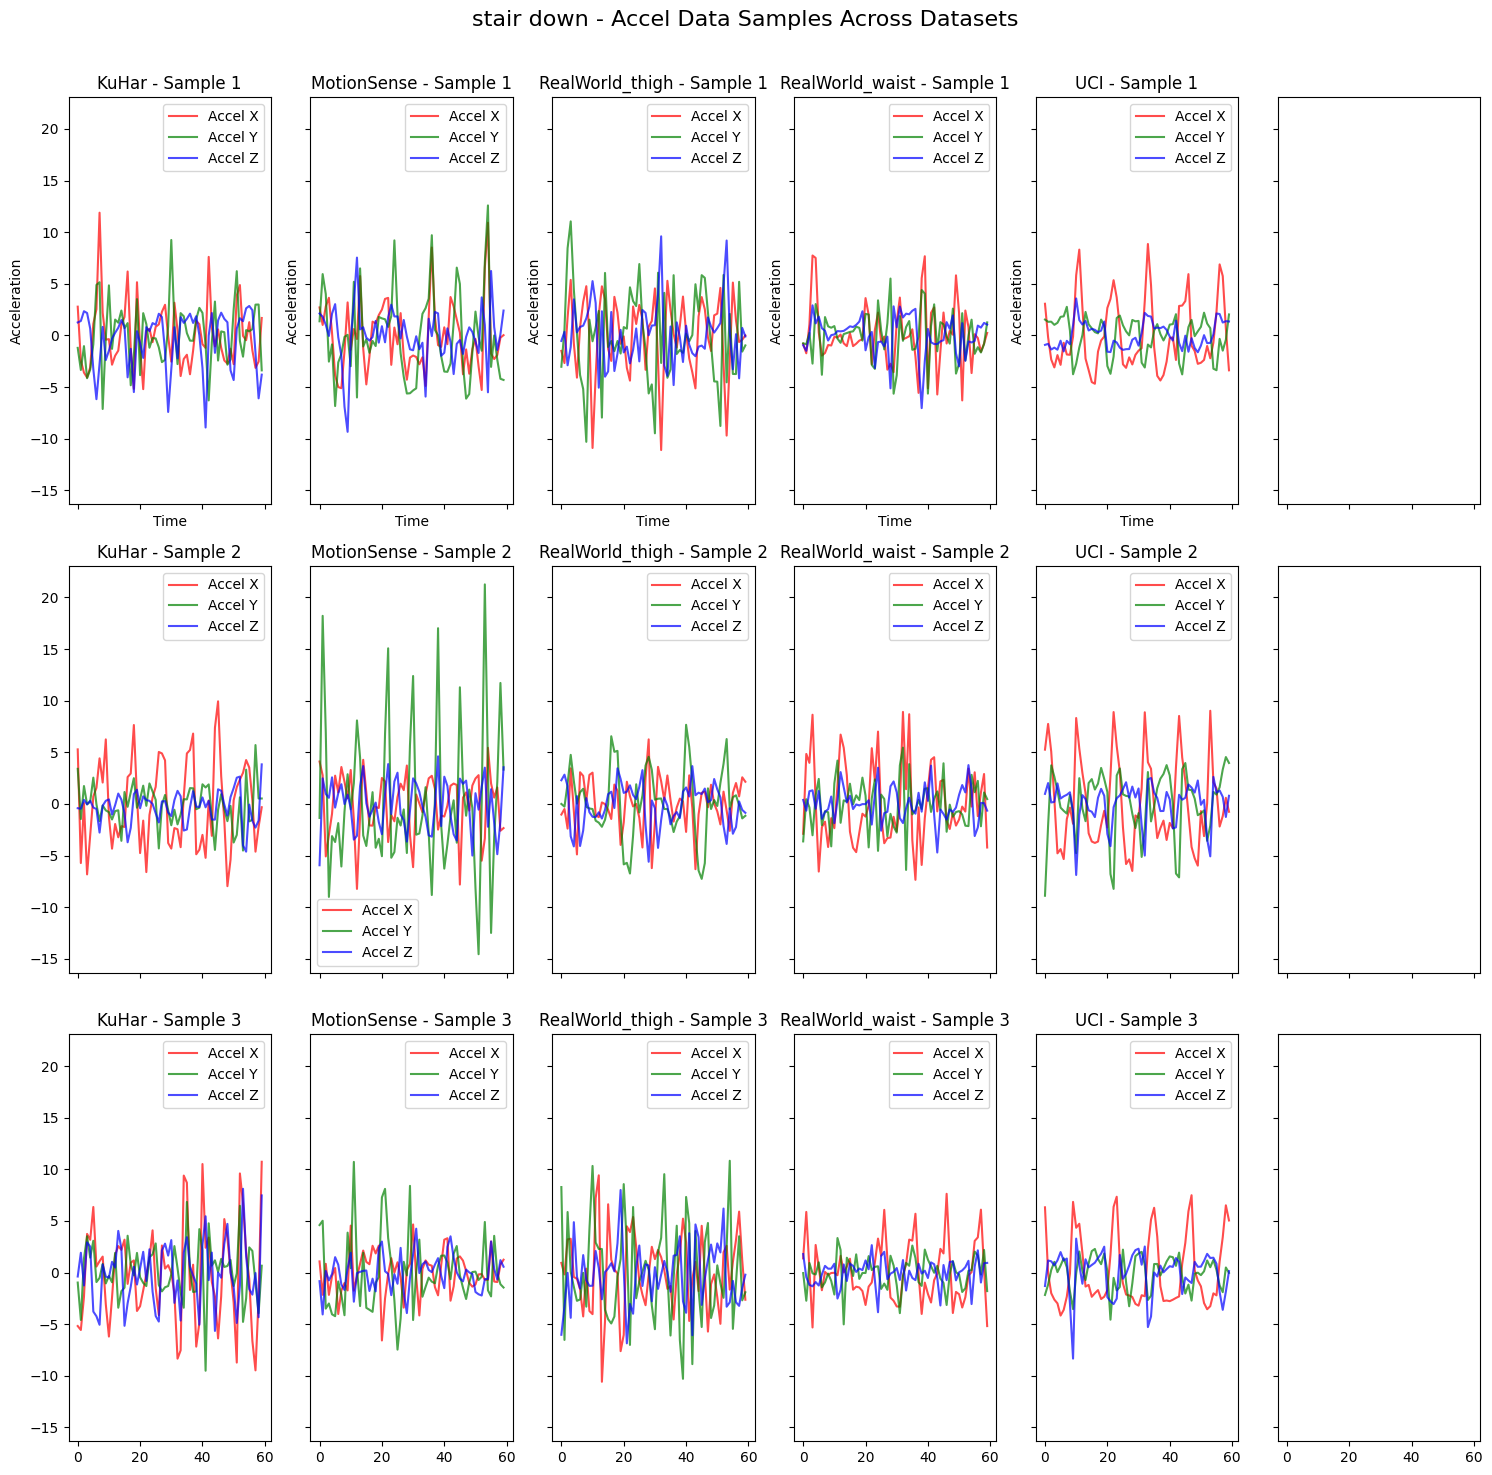

Figuras salvas no arquivo '../reports/exploring all datasets.pdf'.
No data available for activity: run in dataset: UCI


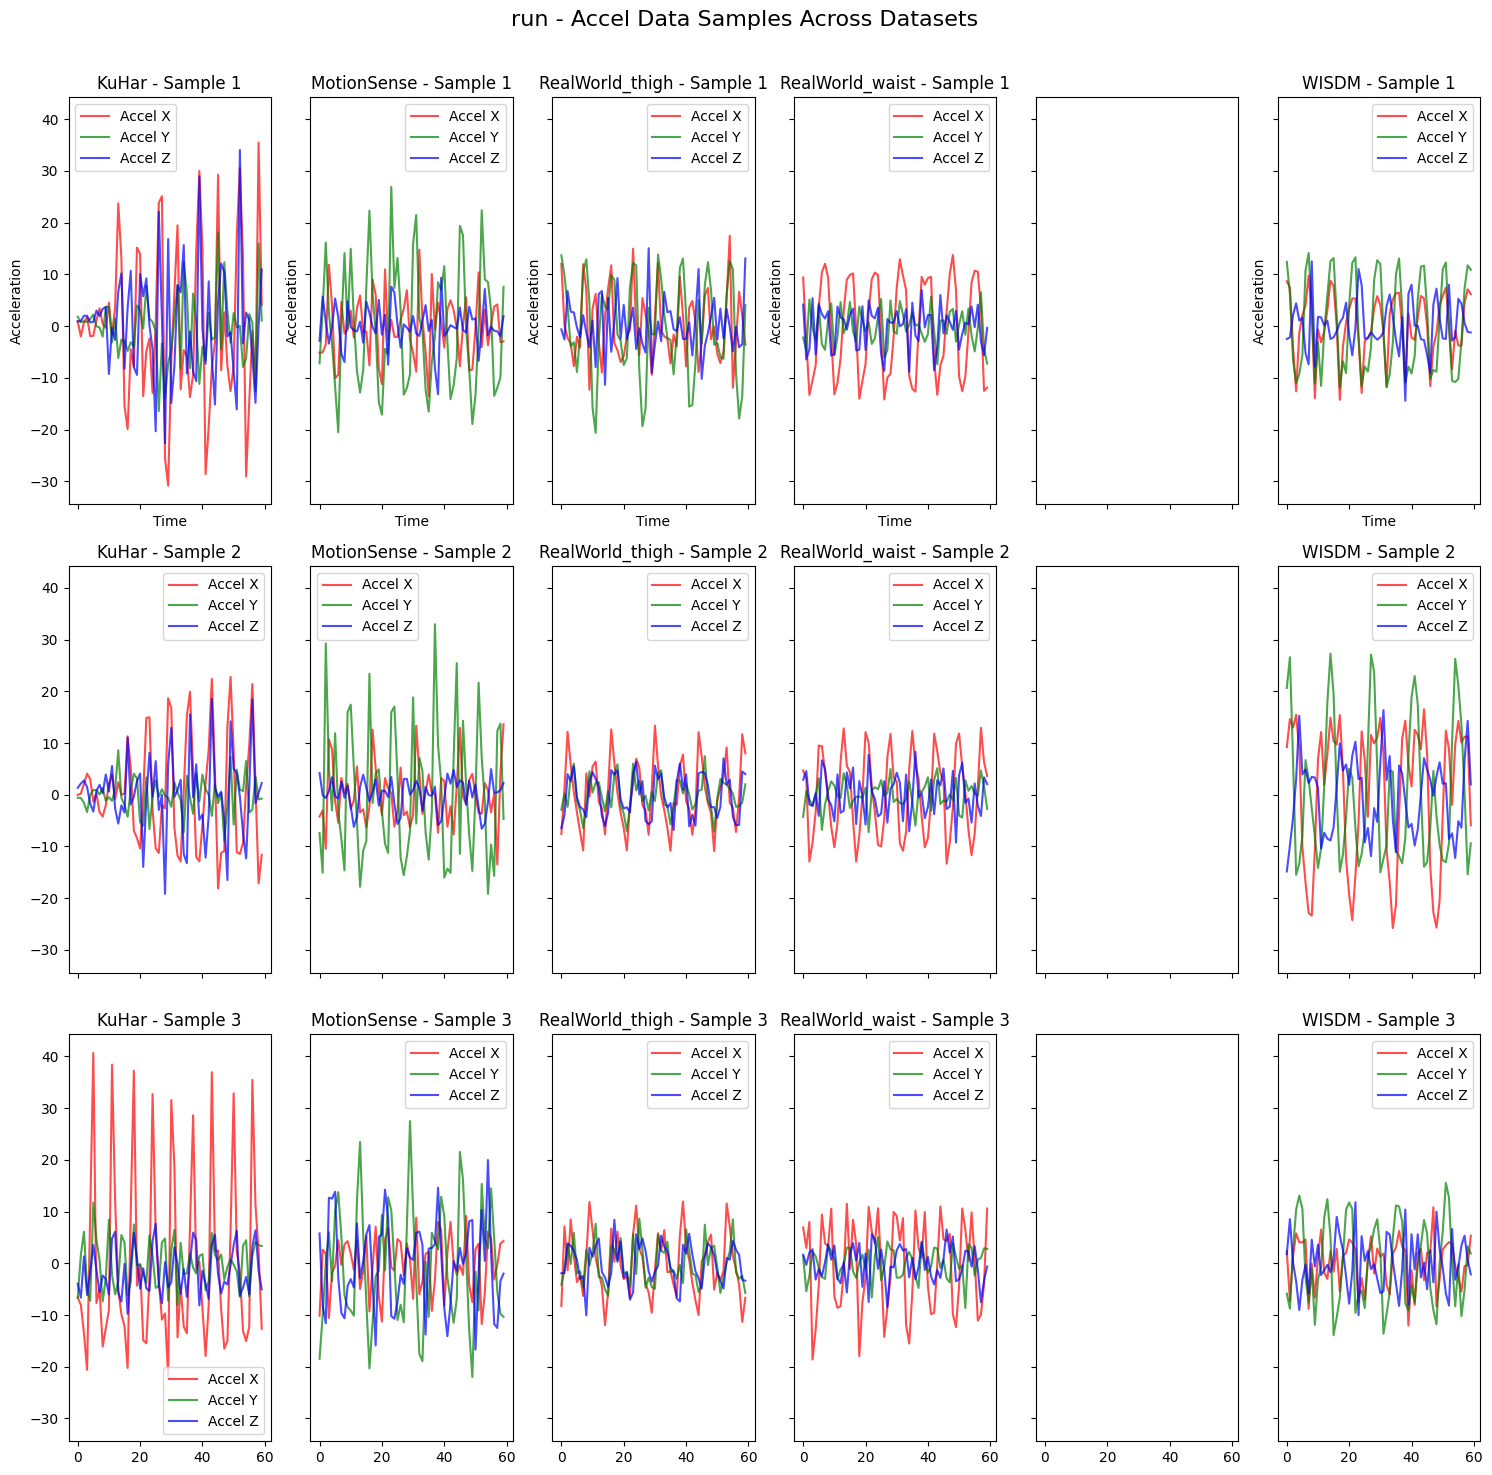

Figuras salvas no arquivo '../reports/exploring all datasets.pdf'.


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_random_accel_samples_multi_dataset(datasets, df_dict, activity_names, num_samples=3):
    """
    Plota amostras aleatórias dos dados do acelerômetro para atividades específicas e múltiplos datasets.
    
    Parâmetros:
    datasets (list of str): Lista com os nomes dos datasets.
    df_dict (dict): Dicionário onde as chaves são os nomes dos datasets e os valores são os DataFrames correspondentes.
    activity_names (list of str): Lista com os nomes das atividades a serem plotadas.
    num_samples (int): Número de amostras aleatórias a serem plotadas para cada atividade.
    """
    for act_id,activity_name in enumerate(activity_names):
        fig, axes = plt.subplots(nrows=num_samples, ncols=len(datasets), figsize=(15, 5*num_samples), sharex=True, sharey=True)
        fig.suptitle(f'{activity_name} - Accel Data Samples Across Datasets', fontsize=16)
        
        for i, dataset_name in enumerate(datasets):
            df = df_dict[dataset_name]
            
            # Filtra os dados para a atividade específica
            activity_data = df[df['standard activity code'] == act_id]
            
            if activity_data.empty:
                print(f"No data available for activity: {activity_name} in dataset: {dataset_name}")
                continue
            
            # Identifica as colunas dos sensores de acelerômetro
            accel_columns_x = [col for col in df.columns if col.startswith('accel-x')]
            accel_columns_y = [col for col in df.columns if col.startswith('accel-y')]
            accel_columns_z = [col for col in df.columns if col.startswith('accel-z')]
            
            # Seleciona amostras aleatórias de índices
            sample_indices = np.random.choice(activity_data.index, num_samples, replace=False)
            
            for j, sample_index in enumerate(sample_indices):
                sample_data = activity_data.loc[sample_index]

                # Extrai os dados das colunas de acelerômetro
                accel_x_data = sample_data[accel_columns_x].values
                accel_y_data = sample_data[accel_columns_y].values
                accel_z_data = sample_data[accel_columns_z].values

                # Plota os dados para cada amostra
                ax = axes[j, i]
                ax.plot(accel_x_data, color='r', alpha=0.7, label='Accel X')
                ax.plot(accel_y_data, color='g', alpha=0.7, label='Accel Y')
                ax.plot(accel_z_data, color='b', alpha=0.7, label='Accel Z')
                
                ax.set_title(f'{dataset_name} - Sample {j+1}')
                if j == 0:
                    ax.set_xlabel('Time')
                    ax.set_ylabel('Acceleration')
                ax.legend()

        plt.tight_layout(rect=[0, 0, 1, 0.97])
        plt.show()
        r_ut.save_fig_pdf('../reports/exploring all datasets.pdf', fig, append=True)  
        

# Carregar os dados para cada dataset
activity_names=['sit', 'stand', 'walk', 'stair up', 'stair down', 'run']

data_dict = {}
for dataset in datasets:
    standardized_view_dataset = StandardizedViewDataset(data_folder, "train")
    df = standardized_view_dataset.load_dataset(dataset, sensors=['accel', 'gyro'])
    data_dict[dataset] = df

# Plotar amostras aleatórias para cada atividade
plot_random_accel_samples_multi_dataset(datasets, data_dict, activity_names)
